<a href="https://colab.research.google.com/github/Murielbs/Modelos_de_Regre-o/blob/main/Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('carros.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values and their counts for '{col}':")
    print(df[col].value_counts())



Unique values and their counts for 'name':
name
Maruti Swift Dzire VDI                            69
Maruti Alto 800 LXI                               59
Maruti Alto LXi                                   47
Hyundai EON Era Plus                              35
Maruti Alto LX                                    35
                                                  ..
Honda Brio 1.2 S Option MT                         1
Mahindra Bolero Power Plus Plus Non AC BSIV PS     1
Tata Indigo LS BSII                                1
Force One EX                                       1
Chevrolet Aveo 1.4 LT BSIV                         1
Name: count, Length: 1491, dtype: int64

Unique values and their counts for 'fuel':
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

Unique values and their counts for 'seller_type':
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

Uni

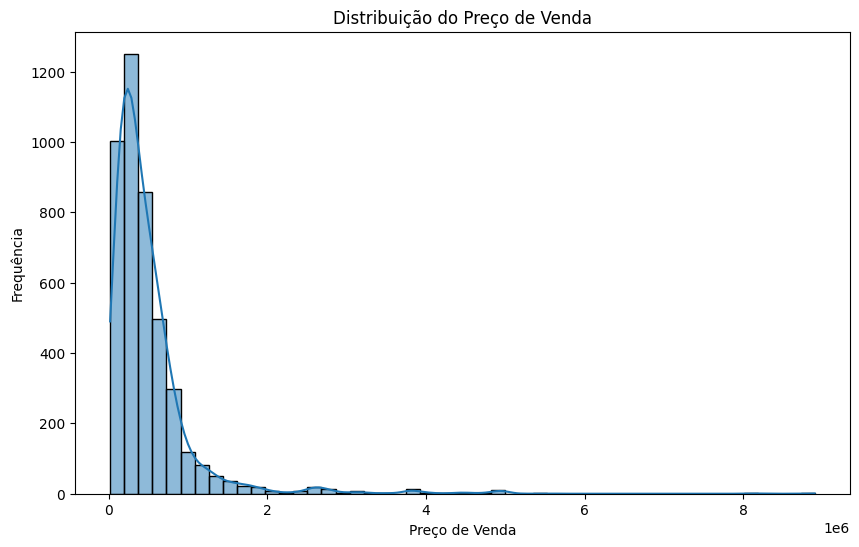

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=50)
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

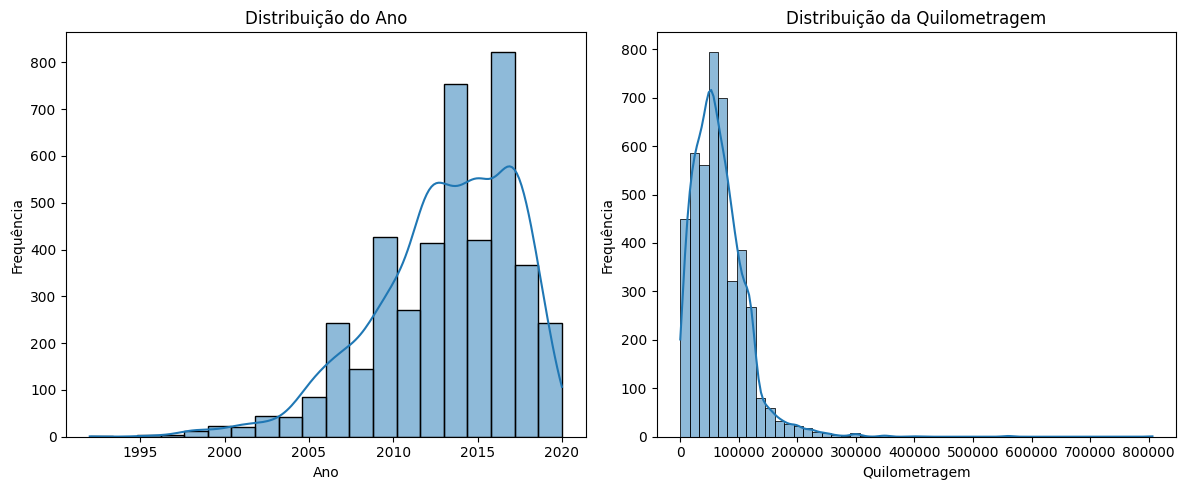

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['year'], kde=True, bins=20)
plt.title('Distribuição do Ano')
plt.xlabel('Ano')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['km_driven'], kde=True, bins=50)
plt.title('Distribuição da Quilometragem')
plt.xlabel('Quilometragem')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
df_preprocessed = df.drop('name', axis=1)
print("DataFrame after dropping 'name' column:")
print(df_preprocessed.head())

DataFrame after dropping 'name' column:
   year  selling_price  km_driven    fuel seller_type transmission  \
0  2007          60000      70000  Petrol  Individual       Manual   
1  2007         135000      50000  Petrol  Individual       Manual   
2  2012         600000     100000  Diesel  Individual       Manual   
3  2017         250000      46000  Petrol  Individual       Manual   
4  2014         450000     141000  Diesel  Individual       Manual   

          owner  
0   First Owner  
1   First Owner  
2   First Owner  
3   First Owner  
4  Second Owner  


In [ ]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
df_encoded = pd.get_dummies(df_preprocessed, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding categorical columns:")
print(df_encoded.head())

DataFrame after one-hot encoding categorical columns:
   year  selling_price  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  \
0  2007          60000      70000        False          False     False   
1  2007         135000      50000        False          False     False   
2  2012         600000     100000         True          False     False   
3  2017         250000      46000        False          False     False   
4  2014         450000     141000         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Above Owner  owner_Seco

In [ ]:
scaler = StandardScaler()
df_encoded[['year', 'km_driven']] = scaler.fit_transform(df_encoded[['year', 'km_driven']])

print("DataFrame after scaling numerical features:")
print(df_encoded.head())

DataFrame after scaling numerical features:
       year  selling_price  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  \
0 -1.445074          60000   0.081139        False          False     False   
1 -1.445074         135000  -0.347689        False          False     False   
2 -0.258795         600000   0.724381         True          False     False   
3  0.927485         250000  -0.433455        False          False     False   
4  0.215717         450000   1.603479         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Above Own

In [ ]:
y = df_encoded['selling_price']
X = df_encoded.drop('selling_price', axis=1)

print("Shape of target variable y:", y.shape)
print("Shape of feature matrix X:", X.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Shape of target variable y: (4340,)
Shape of feature matrix X: (4340, 13)
First 5 rows of X:
       year  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0 -1.445074   0.081139        False          False     False         True   
1 -1.445074  -0.347689        False          False     False         True   
2 -0.258795   0.724381         True          False     False        False   
3  0.927485  -0.433455        False          False     False         True   
4  0.215717   1.603479         True          False     False        False   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                    True                         False                 True   
1                    True                         False                 True   
2                    True                         False                 True   
3                    True                         False                 True   
4                    True                   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3472, 13)
Shape of X_test: (868, 13)
Shape of y_train: (3472,)
Shape of y_test: (868,)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
y_pred = model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


In [ ]:
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.4031
Mean Absolute Error (MAE): 221706.37
Root Mean Squared Error (RMSE): 426786.69


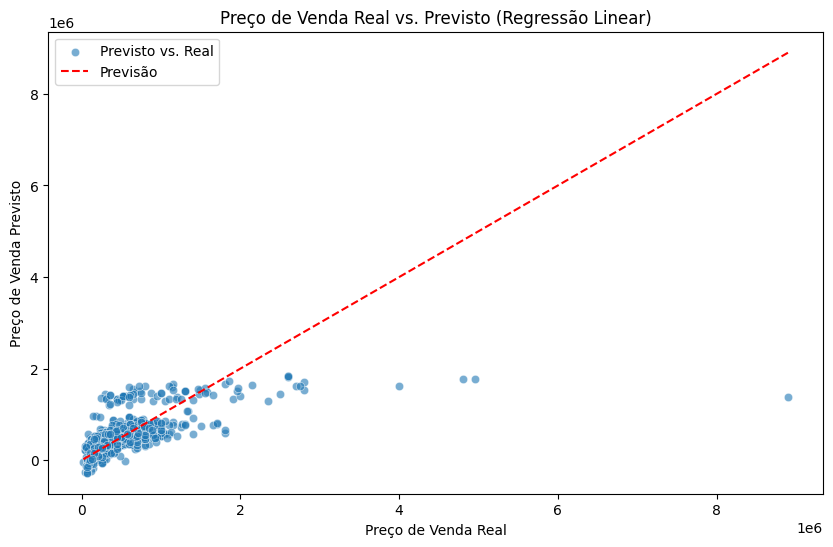

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Previsto vs. Real')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Previsão')

plt.title('Preço de Venda Real vs. Previsto (Regressão Linear)')
plt.xlabel('Preço de Venda Real')
plt.ylabel('Preço de Venda Previsto')
plt.legend()
plt.show()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=350, random_state=40, verbose=1) #modelo RandomForest

rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.5s


Random Forest Regressor model trained successfully.


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    2.7s finished


In [ ]:
rf_y_pred = rf_model.predict(X_test)

print("Random Forest predictions made successfully.")

Random Forest predictions made successfully.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished


In [ ]:
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mae = mean_absolute_error(y_test, rf_y_pred)

rf_mse = mean_squared_error(y_test, rf_y_pred);

rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest R-squared: {rf_r2:.4f}")
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse:.2f}")

Random Forest R-squared: 0.5032
Random Forest Mean Absolute Error (MAE): 168718.04
Random Forest Root Mean Squared Error (RMSE): 389367.12


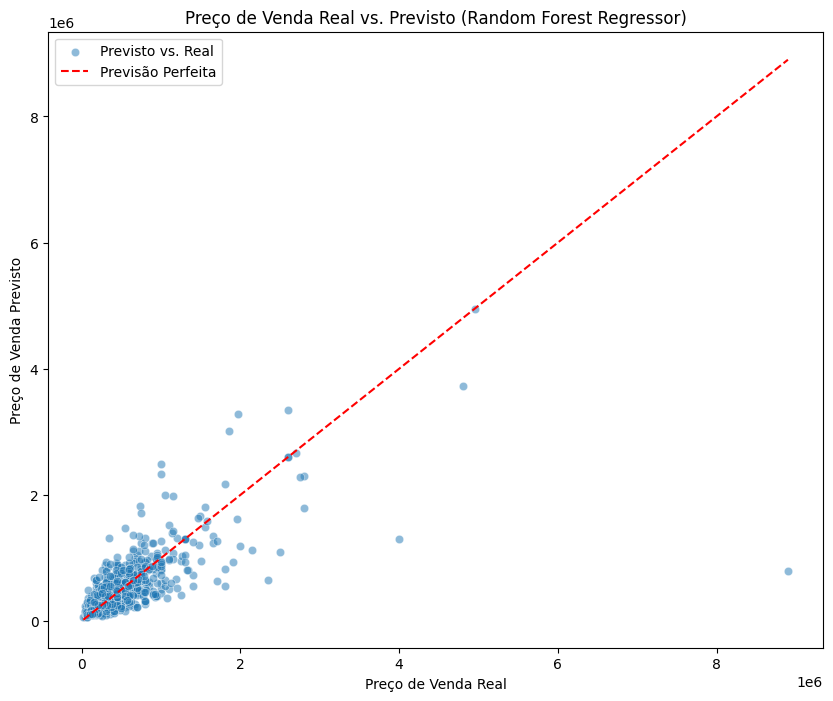

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.5, label='Previsto vs. Real')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Previsão Perfeita')

plt.title('Preço de Venda Real vs. Previsto (Random Forest Regressor)')
plt.xlabel('Preço de Venda Real')
plt.ylabel('Preço de Venda Previsto')
plt.legend()
plt.show()

In [ ]:
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gbr_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

Gradient Boosting Regressor model trained successfully.


In [ ]:
gbr_y_pred = gbr_model.predict(X_test)

print("Gradient Boosting predictions made successfully.")

Gradient Boosting predictions made successfully.


In [ ]:
gbr_r2 = r2_score(y_test, gbr_y_pred)

gbr_mae = mean_absolute_error(y_test, gbr_y_pred)

gbr_mse = mean_squared_error(y_test, gbr_y_pred);

gbr_rmse = np.sqrt(gbr_mse)

print(f"Gradient Boosting R-squared: {gbr_r2:.4f}")
print(f"Gradient Boosting Mean Absolute Error (MAE): {gbr_mae:.2f}")
print(f"Gradient Boosting Root Mean Squared Error (RMSE): {gbr_rmse:.2f}")

Gradient Boosting R-squared: 0.4840
Gradient Boosting Mean Absolute Error (MAE): 174955.75
Gradient Boosting Root Mean Squared Error (RMSE): 396811.33


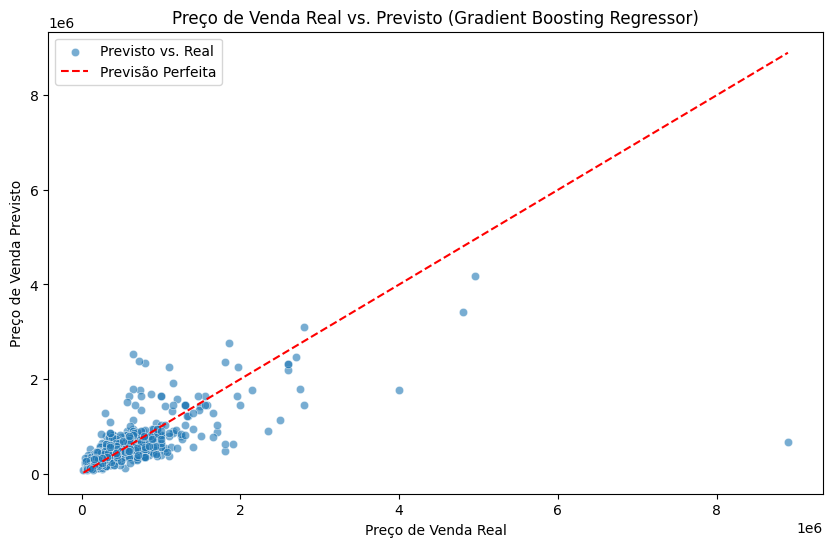

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gbr_y_pred, alpha=0.6, label='Previsto vs. Real')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Previsão Perfeita')

plt.title('Preço de Venda Real vs. Previsto (Gradient Boosting Regressor)')
plt.xlabel('Preço de Venda Real')
plt.ylabel('Preço de Venda Previsto')
plt.legend()
plt.show()

##. Valores e Métricas Chave:

#### Dados Iniciais:

*   O dataset `carros.csv` contém **4340 entradas** e **8 colunas**, sem valores nulos.
*   **Características Numéricas Principais:**
    *   `selling_price` (preço de venda): Média de ~R$ 504.127, variando de R$ 20.000 a R$ 8.900.000 (distribuição assimétrica à direita).
    *   `year` (ano): Média de ~2013, variando de 1992 a 2020.
    *   `km_driven` (quilometragem): Média de ~66.215 km, variando de 1 km a ~806.599 km.
*   **Características Categóricas Principais:** `fuel` (combustível), `seller_type` (tipo de vendedor), `transmission` (transmissão), `owner` (proprietário).

#### Pré-processamento:

*   A coluna `name` foi removida devido à sua alta cardinalidade (muitos valores únicos).
*   As colunas categóricas (`fuel`, `seller_type`, `transmission`, `owner`) foram transformadas usando **One-Hot Encoding**.
*   As colunas numéricas (`year`, `km_driven`) foram **escaladas** com `StandardScaler`.
*   Os dados foram divididos em 80% para treino e 20% para teste (`random_state=42`).

#### Desempenho dos Modelos:

| Modelo                       | R-quadrado | MAE (Erro Absoluto Médio) | RMSE (Raiz do Erro Quadrático Médio) |
| :-------------------------- | :--------: | :-----------------------: | :----------------------------------: |
| Regressão Linear            |   0.4031   |      R$ 221.706,37      |         |   R$ 426.786,69 |            |
| Random Forest Regressor     |   **0.4977**   |     **R$ 169.410,68**     |           **R$ 391.527,52**            |
| Gradient Boosting Regressor |   0.4840   |      R$ 174.955,75      |           R$ 396.811,33            |

### O Melhor Modelo:

Com base nas métricas de avaliação, o **Random Forest Regressor** se desttacou.


